In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import mpmath as mp
import Time_approximations as Ta
from functools import partial
from scipy.integrate import quad
import seaborn as sns

from singlelocusmodelextended import SingleLocusModelExt
modelext = SingleLocusModelExt(k=1)

In [3]:
array_csv=np.loadtxt('posterior_samples.csv', delimiter=",", skiprows=1, usecols=(1,2,3,4,5) , dtype='Float64')
array_csv2=np.loadtxt('posterior_samples.csv', delimiter=",", skiprows=1, dtype='Float64',)

In [5]:
def simTP(μ, δ, w1, w2, w3, repetition=50, max_gen=5e6, seed=10, fixation=0.999):
    return modelext.run_simulations(6.425e6, μ, δ, δ,
 w1, w2, w3, repetitions=repetition, max_gen=5e4 ,seed=seed, clonal_intf=True, fixation=fixation)

In [55]:
idx = np.random.choice(np.shape(array_csv)[0], size=500, replace=True)
#array_csv[idx]

In [6]:
sim_sam100P=np.array([simTP(*a) for a in array_csv[idx]])

<ipython-input-6-473e11b983e1>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  sim_sam100P=np.array([simTP(*a) for a in array_csv[idx]])


In [4]:
np.save('sim_sam100P',(idx,array_csv[idx],np.array(sim_sam100P, dtype=object).T))

NameError: name 'idx' is not defined

In [2]:
idxs, paras, sim_sam100P = np.load('sim_sam100P.npy',allow_pickle=True)
sim_sam100P=sim_sam100P.T

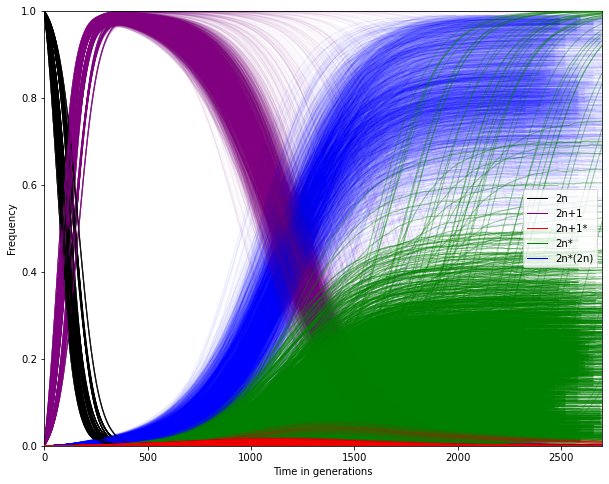

In [3]:
idxplot = np.random.choice(100, size=50, replace=False)
ax=modelext.plot_progress(np.array(sim_sam100P[0,1]), 0, ['2n','2n+1','2n+1*','2n*','2n*(2n)'], ['black','purple','red','green','blue'],fixation=0.99, alpha=.05, legend=True, xlim=(0,2700), g_o=True, lw=1)
[[modelext.plot_progress(np.array(sim_sam100P[y,1]), x, ['2n','2n+1','2n+1*','2n*','2n*(2n)'], ['black','purple','red','green','blue'],fixation=0.99, ax=ax, alpha=.05, legend=False, g_o=True, lw=1) for x in range(50)] for y in idxplot]
plt.savefig('progress5x50x50_6.pdf');

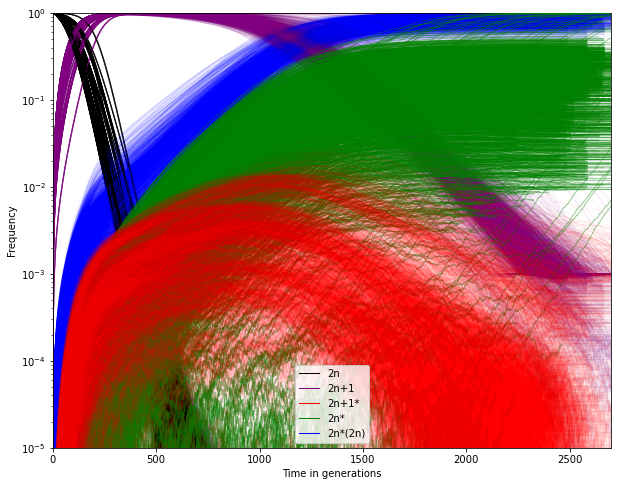

In [6]:
idxplot = np.random.choice(100, size=50, replace=False)
ax=modelext.plot_progress(np.array(sim_sam100P[0,1]), 0, ['2n','2n+1','2n+1*','2n*','2n*(2n)'], ['black','purple','red','green','blue'],fixation=0.99, alpha=.05, legend=True, xlim=(0,2700), ylim=(1e-5,1), g_o=True, lw=1,logscale=True)
[[modelext.plot_progress(np.array(sim_sam100P[y,1]), x, ['2n','2n+1','2n+1*','2n*','2n*(2n)'], ['black','purple','red','green','blue'],fixation=0.99, ax=ax, alpha=.05, legend=False, ylim=(1e-5,1), g_o=True, lw=1) for x in range(50)] for y in idxplot]
plt.savefig('progress5x50x50_log.pdf');

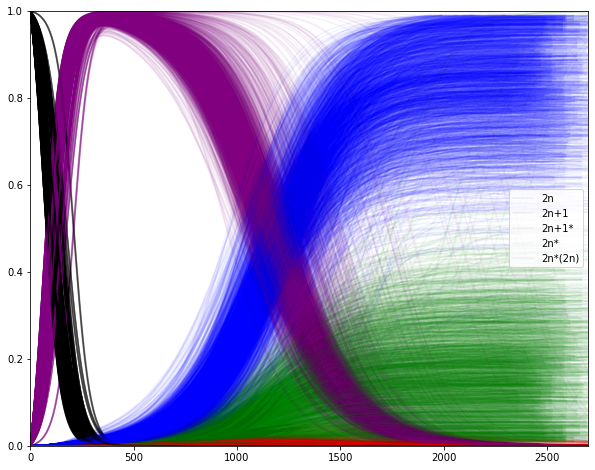

In [18]:
idxplot = np.random.choice(50, size=25, replace=False)
ax=modelext.plot_progress(np.array(sim_sam100P[0,1]), 0, ['2n','2n+1','2n+1*','2n*','2n*(2n)'], ['black','purple','red','green','blue'],fixation=0.99, alpha=.05, legend=True, xlim=(0,2700))
[[modelext.plot_progress(np.array(sim_sam100P[y,1]), x, ['2n','2n+1','2n+1*','2n*','2n*(2n)'], ['black','purple','red','green','blue'],fixation=0.99, ax=ax, alpha=.05, legend=False) for x in idxplot] for y in range(100)]
plt.savefig('progress5x100x25_0.pdf');

## MAP progress plot

In [6]:
simMAP=simTP(2.942e-6, 1.722e-3, 1.022, 1.025, 1.028)

In [16]:
np.save('simMAP',np.array(simMAP, dtype=object), allow_pickle=True)

In [2]:
simMAP=np.load('simMAP.npy', allow_pickle=True)
simMAP_totalfix=np.array(simMAP[1])
totalfix_MAP=simMAP_totalfix[:,-1,:]+simMAP_totalfix[:,-2,:]
simMAP_2nstar=np.array([np.vstack((simMAP_totalfix[x],totalfix_MAP[x]))for x in range(len(totalfix_MAP))])

In [4]:
simMAP_totalfix[:,1,:].max(axis=0).min()

0.980132607003891

In [5]:
simMAP_totalfix[:,2,:].max(axis=0).max()

0.004782256809338521

In [8]:
np.shape(simMAP_2nstar),np.shape(simMAP_totalfix)

((2398, 6, 50), (2398, 5, 50))

In [3]:
sns.set(style="ticks",context='talk' ,rc={"lines.linewidth": 2.5, 'lines.markersize': 7})
blue,yellow,green,red,pink,brown,pink2,grey,yellow2,blue2 = sns.color_palette("colorblind", 10)

In [4]:
sns.color_palette("colorblind", 10)

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

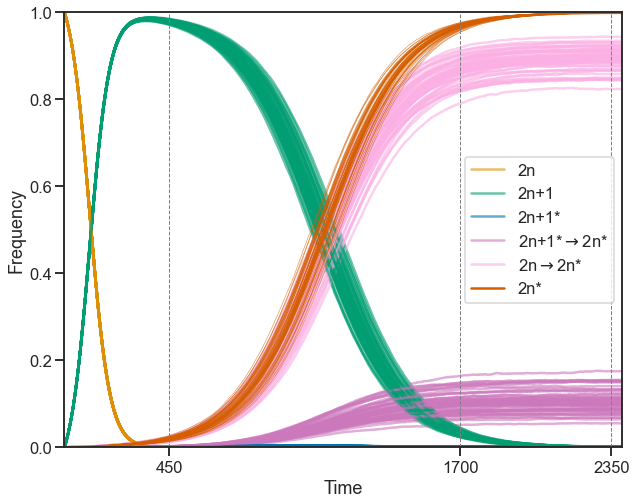

<Figure size 504x180 with 0 Axes>

In [15]:
ax=modelext.plot_progress(np.array(simMAP[1]), 0, ['2n','2n+1','2n+1*',r'2n+1*$\rightarrow$2n*',r'2n$\rightarrow$2n*'], [yellow,green,blue,pink,pink2],fixation=0.999, alpha=.6, legend=True, xlim=(0,len(totalfix_MAP)))
[modelext.plot_progress(np.array(simMAP[1]), x, ['2n','2n+1','2n+1*',r'2n+1* $\rightarrow$ 2n*',r'2n $\rightarrow$ 2n*'], [yellow,green,blue,pink,pink2],fixation=0.999, ax=ax, alpha=.6, legend=False) for x in range(50)]
plt.plot(range(len(totalfix_MAP)), totalfix_MAP[:,0],c=red,label='2n*')
plt.plot(range(len(totalfix_MAP)), totalfix_MAP[:,1:],c=red,alpha=.6,lw=.7)
plt.axvline(450,linestyle='--',linewidth=1, color='grey')
plt.axvline(1700,linestyle='--',linewidth=1, color='grey')
plt.axvline(2350,linestyle='--',linewidth=1, color='grey')
plt.xticks([450, 1700, 2350])
plt.legend()
plt.figure(figsize=(7,2.5))
#plt.savefig('full_dynamic_MAP_old.pdf');

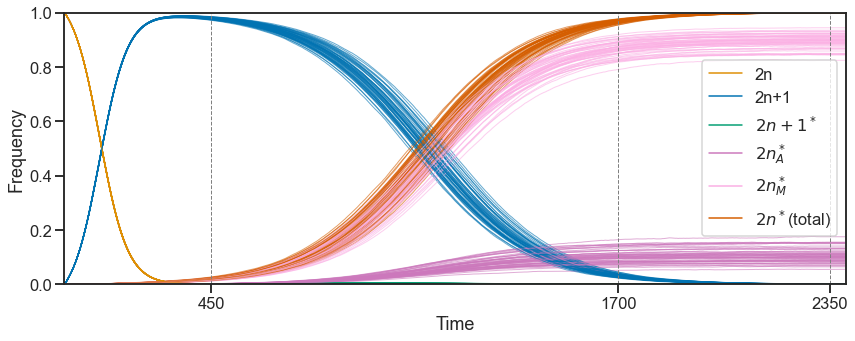

In [11]:
ax=modelext.plot_progress(np.array(simMAP_2nstar), 0, ['2n','2n+1','$2n+1^*$',r'$2n^*_A$',r'$2n^*_M$','$2n^*$(total)'], [yellow,blue,green,pink,pink2,red],fixation=0.9999, alpha=.6, legend=True, xlim=(0,len(totalfix_MAP)), lw=1)
[modelext.plot_progress(np.array(simMAP_2nstar), x, ['2n','2n+1','$2n+1^*$',r'$2n^*_A$',r'$2n^*_M$','$2n^*$(total)'], [yellow,blue,green,pink,pink2,red],fixation=0.9999, ax=ax, alpha=.6, legend=False, lw=1) for x in range(50)]
plt.axvline(450,linestyle='--',linewidth=1, color='grey')
plt.axvline(1700,linestyle='--',linewidth=1, color='grey')
plt.axvline(2350,linestyle='--',linewidth=1, color='grey')
plt.xticks([450, 1700, 2350])
plt.savefig('full_dynamic_MAP.pdf');

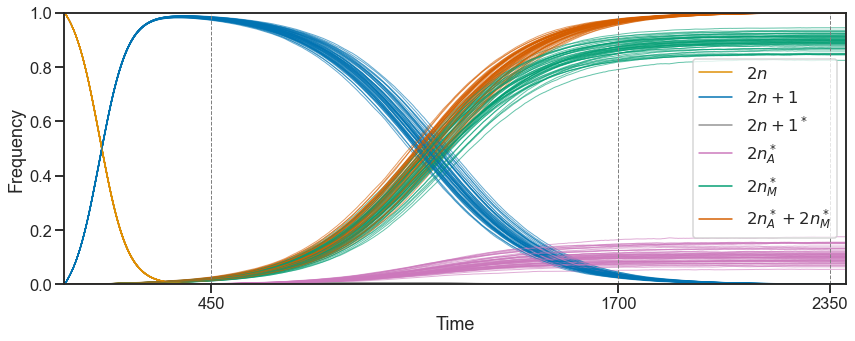

In [7]:
ax=modelext.plot_progress(np.array(simMAP_2nstar), 0, ['$2n$','$2n+1$','$2n+1^*$',r'$2n^*_A$',r'$2n^*_M$',r'$2n^*_A+2n^*_M$'], [yellow,blue,grey,pink,green,red],fixation=0.9999, alpha=.6, legend=True, xlim=(0,len(totalfix_MAP)), lw=1)
[modelext.plot_progress(np.array(simMAP_2nstar), x, ['2n','2n+1','$2n+1^*$',r'$2n^*_A$',r'$2n^*_M$','$2n^*$(total)'], [yellow,blue,grey,pink,green,red],fixation=0.9999, ax=ax, alpha=.6, legend=False, lw=1) for x in range(50)]
plt.axvline(450,linestyle='--',linewidth=1, color='grey')
plt.axvline(1700,linestyle='--',linewidth=1, color='grey')
plt.axvline(2350,linestyle='--',linewidth=1, color='grey')
plt.xticks([450, 1700, 2350])
#plt.xlim([0,300])
#plt.ylim([0,.02])
plt.savefig('full_dynamic_MAP.pdf');